# EDA

EDA (Exploratory Data Analysis) using Pandas and Matplotlib (3.5.1 or above).

In [1]:
# read the titanic train.csv file into a dataframe
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
df = pd.read_csv('train_2.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [2]:
# show the percentage of the passengers that boarded at different ports
embarked_percentage = df['Embarked'].value_counts(normalize=True) * 100
print("Percentage of passengers that boarded at different ports:\n", embarked_percentage)

Percentage of passengers that boarded at different ports:
 Embarked
S    72.440945
C    18.897638
Q     8.661417
Name: proportion, dtype: float64


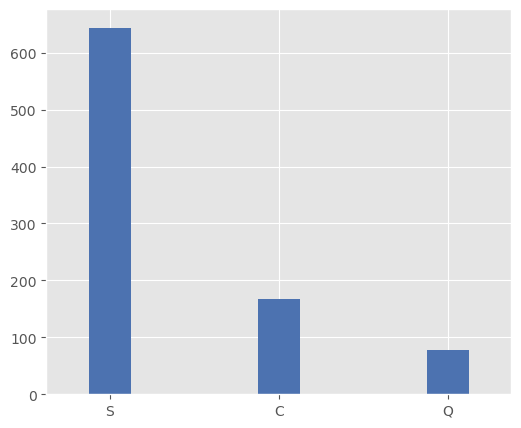

In [7]:
# use seaborn style and pandas plotting to show a histogram of the Embarked column
# a sample diagram is shown below
plt.figure(figsize=(6, 5)) 
df['Embarked'].value_counts().plot(kind='bar', width=0.25,color='#4C72B0')
plt.title('')  
plt.xlabel('')  
plt.ylabel('')  
plt.xticks(rotation=360)
plt.show()

![output](https://user-images.githubusercontent.com/595772/158029846-286dca93-ac7d-4edd-bd0e-da3b46906905.png)

In [9]:
# show the survival rates by gender
# hint: get all survivors, then count how many female and male, etc.
survivors = df[df['Survived'] == 1]
survival_rates_by_gender = survivors['Sex'].value_counts(normalize=True) * 100
print("Survival rates by gender:\n", survival_rates_by_gender)

Survival rates by gender:
 Sex
female    68.128655
male      31.871345
Name: proportion, dtype: float64


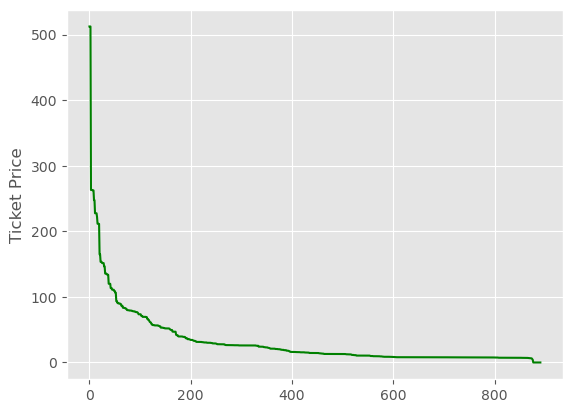

In [16]:
# show a line chart of the ticket price, sorted in descending order
# a sample diagram is shown below
sorted_fares = df['Fare'].sort_values(ascending=False)
plt.plot(sorted_fares.values,color='green')
plt.xlabel('')
plt.ylabel('Ticket Price')
plt.show()


![output](https://user-images.githubusercontent.com/595772/158029862-809dcf1a-76be-492e-9594-e30780b4e88d.png)



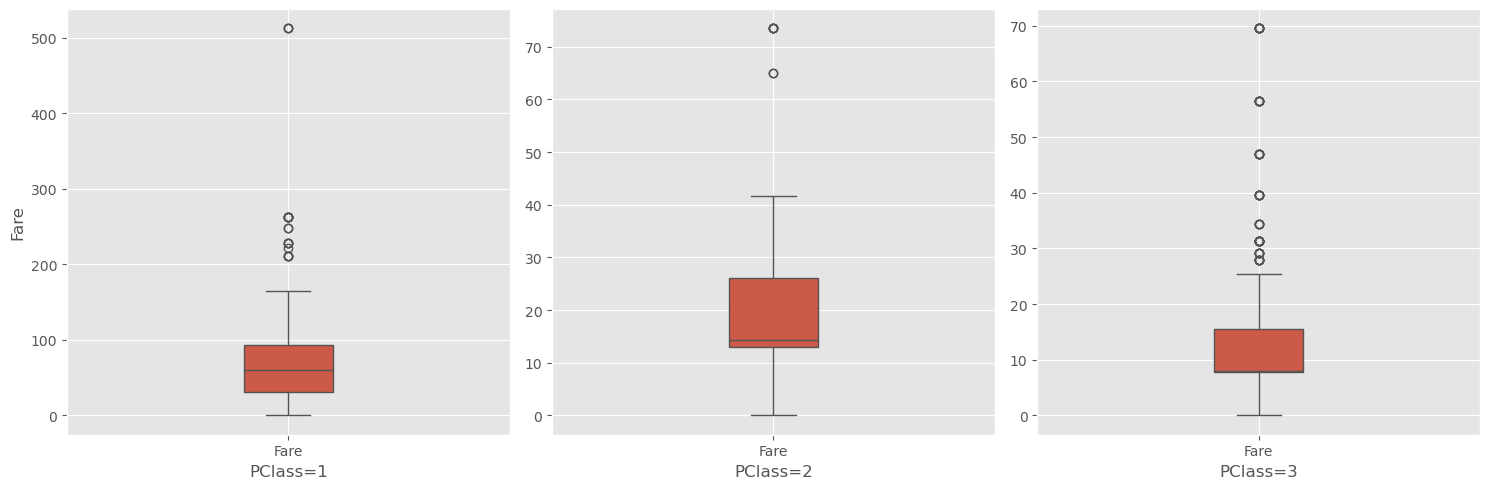

In [17]:
# create a figure with three subplots, size should be (15, 5)
# show the box plot for ticket price with different classes
# you need to set the x labels and y labels
# a sample diagram is shown below

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
sns.boxplot(x='Pclass', y='Fare', data=df[df['Pclass'] == 1], ax=axes[0], width=0.2,)

axes[0].set_xlabel('PClass=1')
axes[0].set_ylabel('Fare')
axes[0].set_xticks([0]) 
axes[0].set_xticklabels(['Fare'])  
axes[0].grid(True) 
sns.boxplot(x='Pclass', y='Fare', data=df[df['Pclass'] == 2], ax=axes[1], width=0.2)

axes[1].set_xlabel('PClass=2')
axes[1].set_ylabel('')
axes[1].set_xticks([0])  
axes[1].set_xticklabels(['Fare'])  
axes[1].grid(True) 

sns.boxplot(x='Pclass', y='Fare', data=df[df['Pclass'] == 3], ax=axes[2], width=0.2)

axes[2].set_xlabel('PClass=3')
axes[2].set_ylabel('')
axes[2].set_xticks([0])  
axes[2].set_xticklabels(['Fare']) 
axes[2].grid(True) 
plt.tight_layout()
plt.show()


![output](https://user-images.githubusercontent.com/595772/158030013-2796b628-5f44-4b09-bed4-c4ab2feb8f3a.png)


In [18]:
# for people with different ticket class, which ticket class group has the highest survival rate?
# for example, you should show: for people with ticket class ?, the survival rate is the highest, which is ?
# hint: you need groupby first and then use some aggregation function
survival_rate_by_class = df.groupby('Pclass')['Survived'].mean() * 100
highest_class = survival_rate_by_class.idxmax()
highest_rate = survival_rate_by_class.max()
print(f"For people with ticket class {highest_class}, the survival rate is the highest, which is {highest_rate:.2f}%.")

For people with ticket class 1, the survival rate is the highest, which is 62.96%.


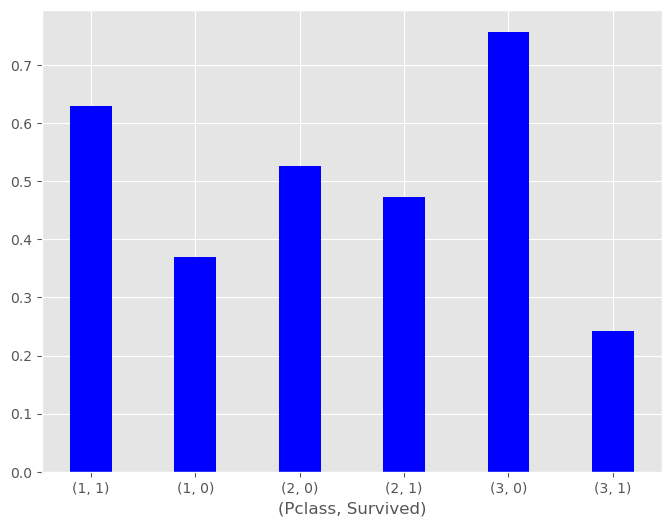

In [20]:
# create a bar plot based on the previous question to show different survival rate by different ticket class
# no need to change the default ticks and tick labels
# a sample diagram is shown below
survival_count = df.groupby(['Pclass', 'Survived']).size().unstack(fill_value=0)

survival_rate = survival_count.div(survival_count.sum(axis=1), axis=0)

survival_rate_ordered = [
    survival_rate.loc[1, 1], survival_rate.loc[1, 0],  # (1, 1), (1, 0)
    survival_rate.loc[2, 0], survival_rate.loc[2, 1],  # (2, 0), (2, 1)
    survival_rate.loc[3, 0], survival_rate.loc[3, 1]   # (3, 0), (3, 1)
]

x_labels = ['(1, 1)', '(1, 0)', '(2, 0)', '(2, 1)', '(3, 0)', '(3, 1)']

plt.figure(figsize=(8, 6))
plt.bar(x_labels, survival_rate_ordered, color='blue', width=0.4)
plt.xlabel('(Pclass, Survived)')
plt.show()

![output](https://user-images.githubusercontent.com/595772/158030040-263e699c-04c4-4c29-9bbe-730ee944b5f2.png)
